In [12]:
import pyreadstat 
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm
from math import exp
# from sklearn.preprocessing import scale
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from scipy.stats import poisson, lognorm, pareto, expon, norm
# from math import exp
# from sklearn.mixture import GaussianMixture
# import scipy.stats as stats

In [2]:
file_path = 'data/r29i_os_73.sav'
df, meta = pyreadstat.read_sav(file_path)

## Отпуск

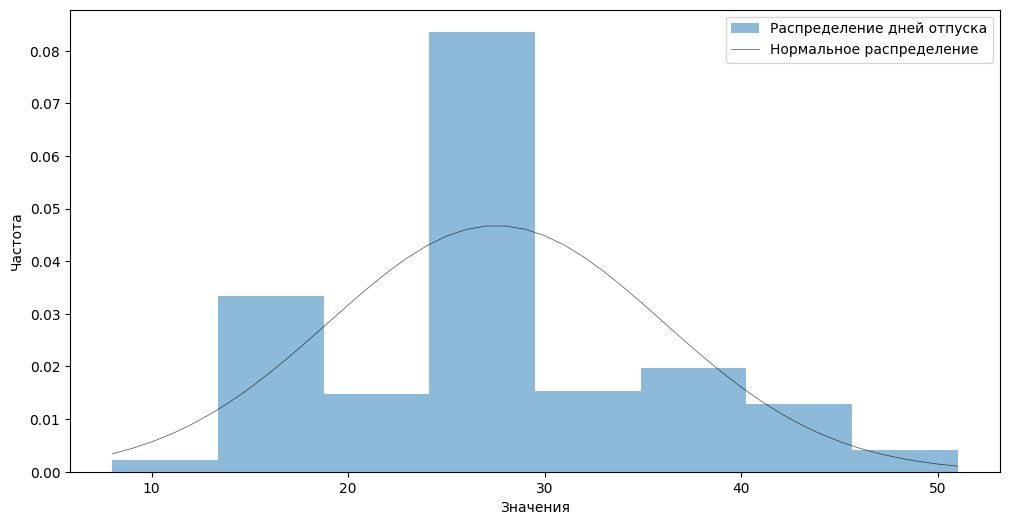

In [5]:
vac = df['yj21b'].dropna().tolist()
vac=np.array([i for i in vac if 7.5<=i<=51.5])

μ_hat_vac = np.mean(vac)
σ_hat_vac =np.sqrt(sum([(i-μ_hat_vac)**2 for i in vac])/(len(vac)-1))

plt.figure(figsize=(12, 6))  
plt.hist(vac, bins=8, density=True, alpha=0.5, histtype='stepfilled', label='Распределение дней отпуска')
x = np.arange(int(min(vac)), int(max(vac))+1 )
pdf = norm.pdf(x, loc=μ_hat_vac, scale=σ_hat_vac)
plt.plot(x, pdf, color='k', linestyle='-', linewidth=0.5, alpha=0.7, label='Нормальное распределение')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

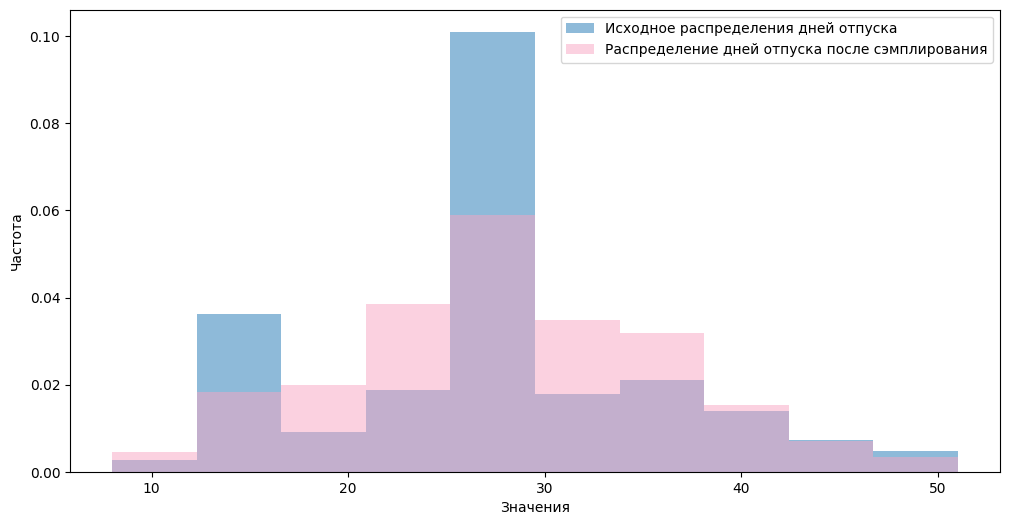

In [6]:
vac2 = np.array(df['yj21b'].tolist())
vac2[vac2 > 51.5] = 999999999
vac2[vac2 < 7.5] = 999999999

vac2_s = []
v_size=np.sum(np.isnan(vac2))
while len(vac2_s) < v_size:
    samples = np.random.normal(μ_hat_vac, σ_hat_vac, size=100) 
    filtered_samples = samples[(samples >= min(vac[~np.isnan(vac)]) ) & (samples <= max(vac[~np.isnan(vac)]))] 
    vac2_s.extend(filtered_samples[:v_size - len(vac2_s)])  

vac2_s = np.array(vac2_s) 
vac2_s = np.ceil(vac2_s).astype(int) 
vac2[np.isnan(vac2)] = vac2_s

vac3 = vac2[vac2 != 999999999]

plt.figure(figsize=(12, 6)) 
plt.hist(vac, density=True, bins=10, histtype='stepfilled', alpha=0.5, label='Исходное распределения дней отпуска', color='#1f77b4')
plt.hist(vac3, density=True, bins=10, alpha=0.5, label='Распределение дней отпуска после сэмплирования', color='#f8a5c2')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

## Рабочая неделя

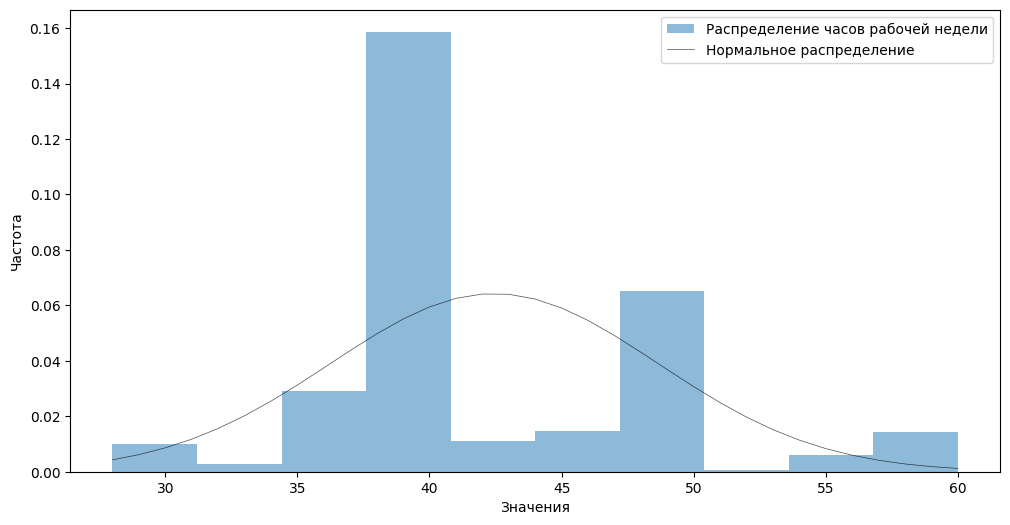

In [7]:
ww = df['yj6.2'].dropna().tolist()
ww=np.array([i for i in ww if i<=60 and i>=28])

μ_hat_ww = np.mean(ww)
σ_hat_ww =np.sqrt(sum([(i-μ_hat_ww)**2 for i in ww])/(len(ww)-1))

plt.figure(figsize=(12, 6)) 
plt.hist(ww, bins=10, density=True, alpha=0.5, histtype='stepfilled', label='Распределение часов рабочей недели')
x = np.arange(int(min(ww)), int(max(ww))+1)
pdf = norm.pdf(x, loc=μ_hat_ww, scale=σ_hat_ww)
plt.plot(x, pdf, color='k', linestyle='-', linewidth=0.5, alpha=0.7, label='Нормальное распределение')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

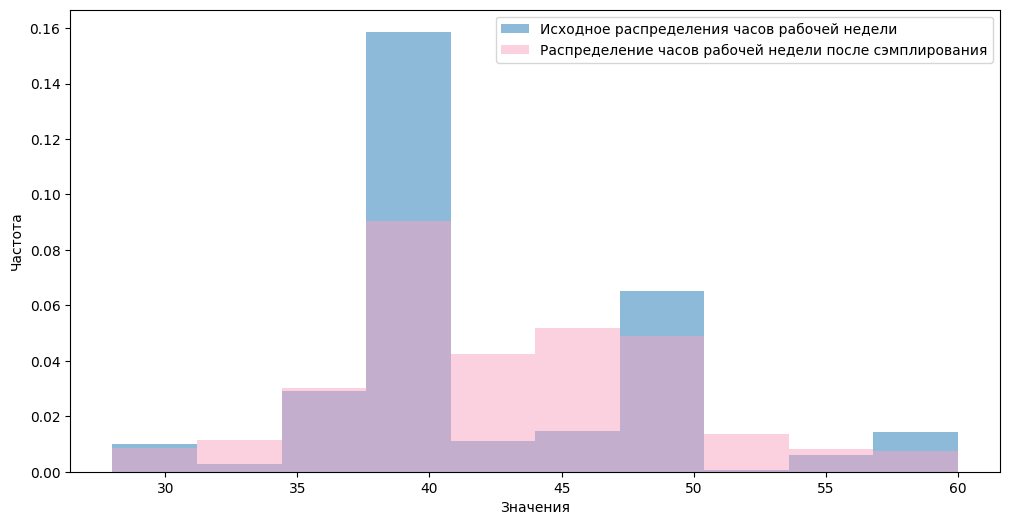

In [8]:
ww2 = np.array(df['yj6.2'].tolist())
ww2[ww2 > 60] = 999999999
ww2[ww2 < 28] = 999999999

ww2_s = []
ww_size=np.sum(np.isnan(ww2))
while len(ww2_s) < ww_size:
    samples = np.random.normal(μ_hat_ww, σ_hat_ww, size=100) 
    filtered_samples = samples[(samples >= min(ww[~np.isnan(ww)]) ) & (samples <= max(ww[~np.isnan(ww)]))] 
    ww2_s.extend(filtered_samples[:ww_size - len(ww2_s)])  

ww2_s = np.array(ww2_s)
ww2_s = np.ceil(ww2_s).astype(int)
ww2[np.isnan(ww2)] = ww2_s

ww3 = ww2[ww2 != 999999999]

plt.figure(figsize=(12, 6)) 
plt.hist(ww, density=True, bins=10, histtype='stepfilled', alpha=0.5, label='Исходное распределения часов рабочей недели', color='#1f77b4')
plt.hist(ww3, density=True, bins=10, alpha=0.5, label='Распределение часов рабочей недели после сэмплирования', color='#f8a5c2')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

## Премия

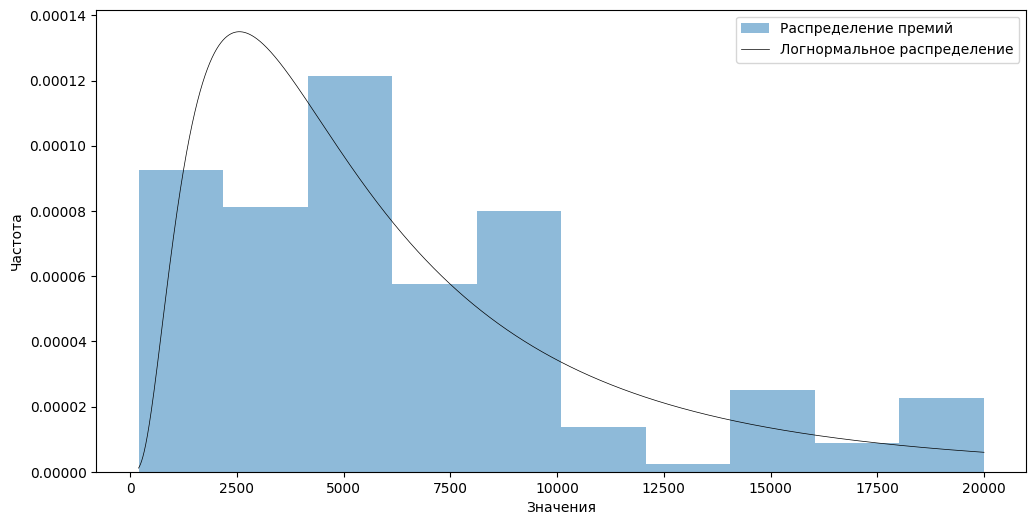

In [13]:
bon = df['yj10.2'].dropna().tolist()
bon = np.array([i for i in bon if i <= 20500 and i>0])

ln_bon = np.log(bon)
μ_hat_bon = np.mean(ln_bon)
num = (ln_bon - μ_hat_bon)**2
σ_hat_bon = (np.mean(num))**(1/2)

dist_lognorm_bon = lognorm(σ_hat_bon, scale = exp(μ_hat_bon))

x = np.arange(int(min(bon)), int(max(bon))+1 )
plt.figure(figsize=(12, 6))  
plt.hist(bon, density=True, bins=10, histtype='stepfilled', alpha=0.5,label='Распределение премий')
plt.plot(x, dist_lognorm_bon.pdf(x), 'k-', lw=0.5, label='Логнормальное распределение')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

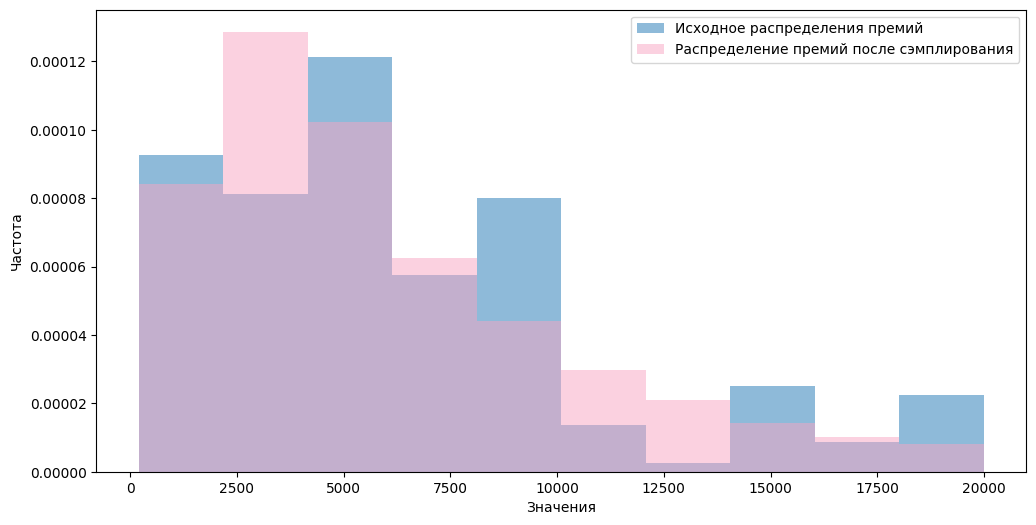

In [14]:
bon2 =np.array(df['yj10.2'].tolist())
bon2[bon2 == 99999996] = np.nan
bon2[bon2 > 20500] = 999999999

bon2_s = []
bon_size=np.sum(np.isnan(bon2))

while len(bon2_s) < bon_size:
    samples = np.random.lognormal(μ_hat_bon,σ_hat_bon, size=100) 
    
    filtered_samples = samples[(samples >= min(bon[~np.isnan(bon)]) ) & (samples <= max(bon[~np.isnan(bon)]))] 
    bon2_s.extend(filtered_samples[:bon_size - len(bon2_s)])  

bon2_s = np.array(bon2_s)
bon2[np.isnan(bon2)] = bon2_s

bon3 = bon2[bon2 != 999999999]

plt.figure(figsize=(12, 6))  
plt.hist(bon, density=True, bins=10, histtype='stepfilled', alpha=0.5, label='Исходное распределения премий', color='#1f77b4')
plt.hist(bon3, density=True, bins=10, alpha=0.5, label='Распределение премий после сэмплирования', color='#f8a5c2')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

## Зарплата

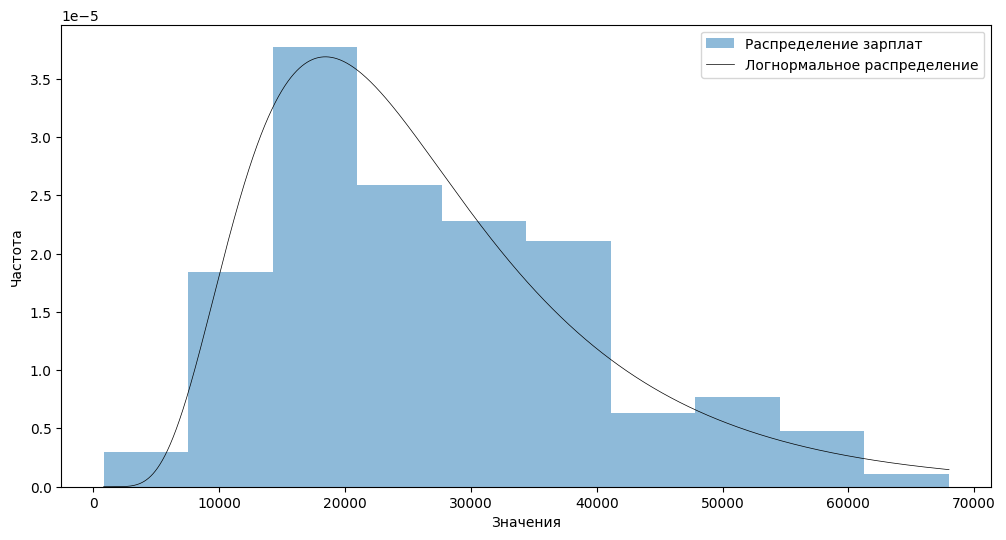

In [15]:
sal = df['yj13.2'].dropna().tolist()
sal = np.array([i for i in sal if i>0 and i <= 68000])

ln_sal = np.log(sal)
μ_hat_sal = np.mean(ln_sal)
num = (ln_sal - μ_hat_sal)**2
σ_hat_sal = (np.mean(num))**(1/2)

dist_lognorm_sal = lognorm(σ_hat_sal, scale = exp(μ_hat_sal))

x = np.arange(int(min(sal))-1, int(max(sal))+1 )
plt.figure(figsize=(12, 6))  
plt.hist(sal, density=True, bins=10, histtype='stepfilled', alpha=0.5, label='Распределение зарплат')
plt.plot(x, dist_lognorm_sal.pdf(x), 'k-', lw=0.5, label='Логнормальное распределение')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

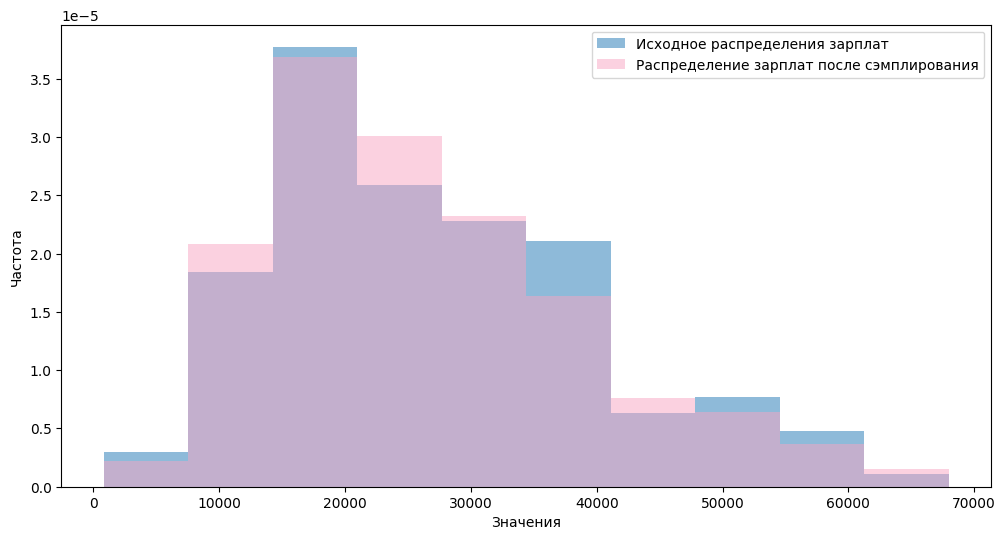

In [16]:
sal2 = np.array(df['yj13.2'].tolist())
sal2[sal2 > 68000] = 999999999
sal2[sal2 == 0] = 999999999

sal2_s = []
sal_size=np.sum(np.isnan(sal2))

while len(sal2_s) < sal_size:
    samples = np.random.lognormal(μ_hat_sal,σ_hat_sal, size=100) 
    filtered_samples = samples[(samples >= min(sal[~np.isnan(sal)]) ) & (samples <= max(sal[~np.isnan(sal)]))] 
    sal2_s.extend(filtered_samples[:sal_size - len(sal2_s)])  

sal2_s = np.array(sal2_s)
sal2[np.isnan(sal2)] = sal2_s

sal3 = sal2[sal2 != 999999999]
plt.figure(figsize=(12, 6))  
plt.hist(sal, density=True, bins=10, histtype='stepfilled', alpha=0.5, label='Исходное распределения зарплат', color='#1f77b4')
plt.hist(sal3, density=True, bins=10, alpha=0.5, label='Распределение зарплат после сэмплирования', color='#f8a5c2')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

## Удовлетворенность работой

NameError: name 'poisson' is not defined

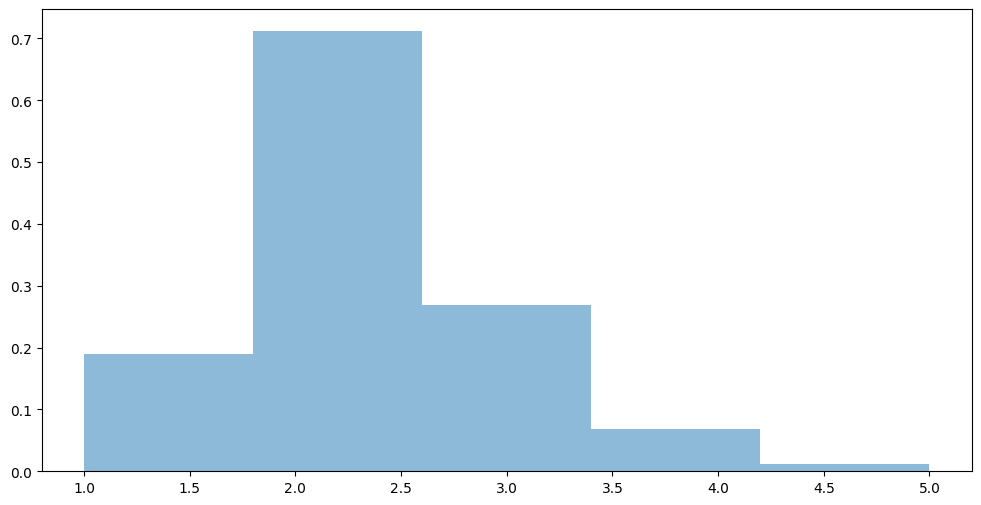

In [17]:
js = df['yj1.1.1'].dropna().tolist()
js = np.array([i for i in js if i < 99999996])

lambda_mle_js = sum(js) / len(js) 

plt.figure(figsize=(12, 6))  
plt.hist(js, bins=5, density=True, alpha=0.5, histtype='stepfilled', label='Исходное распределение удовлетворенности работой')
x = np.arange(1, int(max(js))+1 )
plt.plot(x, poisson.pmf(x, lambda_mle_js), color='k', marker='o', linestyle='-', alpha=0.5, label='Распределение Пуассона')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [18]:
js2 = np.array(df['yj1.1.1'].tolist())
js2[js2 > 5] = np.nan

## Образование

NameError: name 'poisson' is not defined

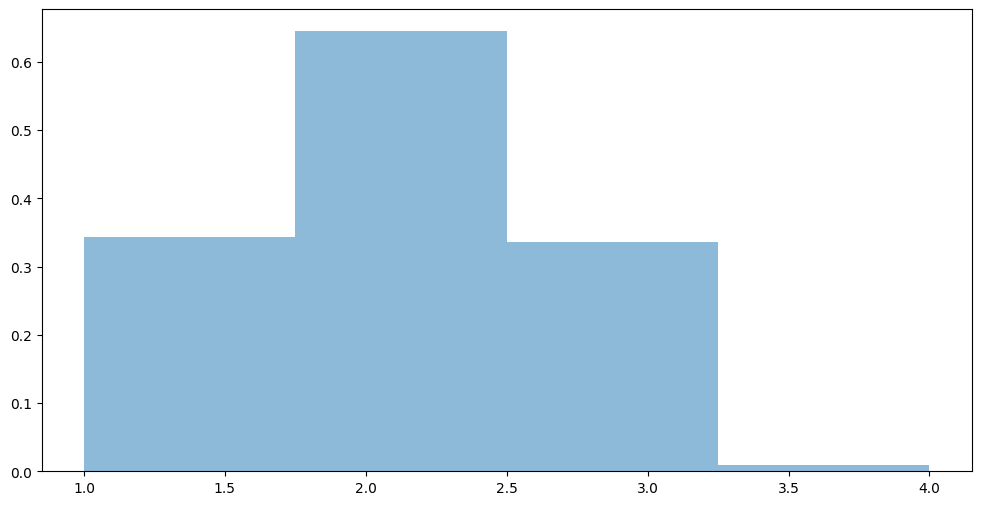

In [19]:
edu = df['yj72.18a'].dropna().tolist()
edu = [ i for i in edu if i < 18]

edu = [
    '1' if i in [1, 2] else 
    '2' if i in [3, 4, 5, 6, 15] else 
    '3' if i in [10, 11, 12] else 
    '4' if i in [16, 17,      13, 14] else 
    str(i) 
    for i in edu
]

edu = np.array([int(i) for i in edu])

lambda_mle_edu = sum(edu) / len(edu) 

plt.figure(figsize=(12, 6)) 
plt.hist(edu, bins=4, density=True, alpha=0.5, histtype='stepfilled', label='Исходное распределение уровня образования')
x = np.arange(int(min(edu)), int(max(edu))+1 )
plt.plot(x, poisson.pmf(x, lambda_mle_edu), color='k', marker='o', linestyle='-', alpha=0.5, label='Распределение Пуассона')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

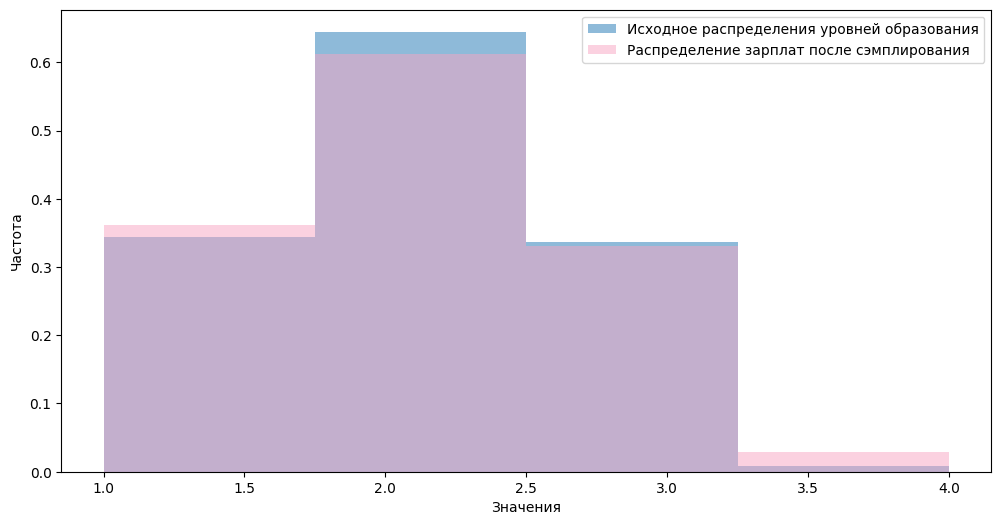

In [ ]:
edu2 = np.array(df['yj72.18a'].tolist())
edu2[edu2 >17] = np.nan

edu2[(edu2 == 1) | (edu2 == 2)] = 1
edu2[(edu2 == 3) | (edu2 == 4)| (edu2 == 5)| (edu2 == 6)| (edu2 == 15)] = 2
edu2[(edu2 == 10) | (edu2 == 11)| (edu2 == 12)] = 3
edu2[(edu2 == 16) | (edu2 == 17)| (edu2 == 13)| (edu2 == 14)] = 4

edu2_s = []
edu_size=np.sum(np.isnan(edu2))

while len(edu2_s) < edu_size:
    samples =np.random.poisson(lambda_mle_edu, size=100)
    filtered_samples = samples[(samples >= min(edu[~np.isnan(edu)]) ) & (samples <= max(edu[~np.isnan(edu)]))] 
    edu2_s.extend(filtered_samples[:edu_size - len(edu2_s)])  

    
edu2[np.isnan(edu2)] = edu2_s

plt.figure(figsize=(12, 6)) 
plt.hist(edu, density=True, bins=4, histtype='stepfilled', alpha=0.5, label='Исходное распределения уровней образования', color='#1f77b4')
plt.hist(edu2, density=True, bins=4, alpha=0.5, label='Распределение зарплат после сэмплирования', color='#f8a5c2')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [21]:
df2= df[['yj21b', 'yj6.2','yj10.2','yj13.2','yj1.1.1','yj72.18a']]

df2.loc[:, 'yj21b'] = vac2
df2.loc[:, 'yj6.2'] = ww2
df2.loc[:, 'yj10.2'] = bon2
df2.loc[:, 'yj13.2'] = sal2
df2.loc[:, 'yj1.1.1'] = js2
df2.loc[:, 'yj72.18a'] = edu2
df2 = df2[~(df2 == 999999999).any(axis=1)]
df2.dropna(subset=['yj1.1.1'], inplace=True)

df2

,yj21b,yj6.2,yj10.2,yj13.2,yj1.1.1,yj72.18a
4,42.0,40.0,11572.206741,25000.0,3.0,2.0
6,21.0,60.0,8205.665614,18000.0,4.0,2.0
12,19.0,48.0,4229.458428,30000.0,4.0,1.0
15,28.0,40.0,2053.307000,38000.0,1.0,3.0
16,28.0,40.0,4102.242173,40000.0,1.0,3.0
...,...,...,...,...,...,...
12106,28.0,48.0,12988.193531,30000.0,2.0,2.0
12107,27.0,60.0,5183.598416,35000.0,3.0,1.0
12108,14.0,40.0,8382.187148,20000.0,3.0,2.0
12113,28.0,40.0,8167.341087,53000.0,2.0,2.0


In [22]:
df2.to_csv('data/df2.csv', index=False)  